# MP1 MountainCar Miniproject Notebook

## Tutorial

This section is here to guide you through the basics of the frameworks necessary for you to do well on your CS456-Miniproject 🤓

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import secrets

### Gymnasium environments

One of the main and most spread environment developer in the field of RL research is [Gymnasium](https://gymnasium.farama.org/). They provide standardized environments offering a large range of difficulties and setups, that are perfectly designed to benchmark performances of RL and Deep RL algorithms.

The main structure is very simple to understand. First, we need to instantiate our environment. We will use an existing environment, but one could also use their structure to design their own environment.

Let's directly work with the Mountain Car environment that will be used in the project. 

_PS: If you're more curious, feel free to browse the large list available on their website!_

In [2]:
env = gym.make('MountainCar-v0')

The environment contains an action space and an observation (state) space. Let's see what these look like.

In [3]:
print(f"Action space: {env.action_space}")
print(f"Observation space: {env.observation_space}")

Action space: Discrete(3)
Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


In [4]:
print(f"Number of actions available: {env.action_space.n}")
print(f"Observation shape: {env.observation_space.shape}")

Number of actions available: 3
Observation shape: (2,)


As we can see, the action space of that first environment is discrete and contains 3 possible actions: accelerate to the left, don't accelerate and accelerate to the right. 

The observation space has a dimension of 2, and you can find what each part represents [here](https://gymnasium.farama.org/environments/classic_control/mountain_car/#observation-space).

Before taking actions, the environment should be reset (or boostrapped). **Note: this should be done every time the environment has to be restarted, i.e., at the end of any episode.**

In [5]:
# the second return value is an info dictionary, but it doesn't contain anything in this environment
starting_state, _ = env.reset() 

print(f"Starting state: {starting_state}")

Starting state: [-0.44127098  0.        ]


Now that we know what the actions look like and that the environment is ready, we can take actions inside it. This is done using the `env.step` function, that takes an action as input, and returns multiple values. More details on each of them can be found [here](https://gymnasium.farama.org/api/env/#gymnasium.Env.step).

In the project, you will have an agent that will choose an action (based on the policy learned) given the current state. However, for now, we can simply sample actions at random using `action_space.sample()`.

In [6]:
action = env.action_space.sample()
print(f"Sampled action: {action}")
next_state, reward, terminated, truncated, _ = env.step(action) # again, the last return value is an empty info object

print(f"Next state: {next_state}")
print(f"Reward: {reward}")
print(f"Terminated: {terminated}")
print(f"Truncated: {truncated}")

Sampled action: 1
Next state: [-0.44188216 -0.0006112 ]
Reward: -1.0
Terminated: False
Truncated: False


The `terminated` and `truncated`  variables represent the two ways that the episode might be done. Thus, it might be handy to use
```
done = terminated or truncated
```
in your code. 💡

We now have all the pieces necessary to run a full episode!

In [7]:
done = False
state, _ = env.reset()
episode_reward = 0

while not done:
    action = env.action_space.sample()
    next_state, reward, terimnated, truncated, _ = env.step(action)

    episode_reward += reward

    state = next_state
    done = terminated or truncated

print(f"Episode reward after taking random actions: {episode_reward}")

Episode reward after taking random actions: -200.0


Now your goal in the project will be to code an agent that can beat that 🙃

## Random Agent Class

This code block describes the implementation of a random agent as described in task 2 of the project handout.

In [8]:
class RandomAgent:
    def __init__(self, environment):
        self.env = environment

    def observe(self, state, action, next_state, reward):
        # This method is just a placeholder for the random agent, as it doesn't learn from observations.
        return

    def select_action(self, state):
        # Randomly select an action from the action space
        # The state therefore does not need to be taken into account
        return self.env.action_space.sample()

    def update(self):
        # No update necessary for a random agent.
        return

Run the agent on the environment until the episode is either truncated or terminated. Store the episode and render (visualize) it.

In [9]:
def run_single_episode(agent):
    """Run the RandomAgent for a single episode
    """
    done = False
    state, _ = agent.env.reset()
    episode_reward = 0
    states = [state]

    while not done:
        action = agent.select_action(state)
        next_state, reward, terminated, truncated, _ = agent.env.step(action)
        episode_reward += reward
        
        # observe and update does not do anything for the random agent
        agent.observe(state, action, next_state, reward)
        agent.update()
        
        state = next_state
        states.append(state)

        done = terminated or truncated

    return episode_reward, states

In [10]:
def plot_states_over_time(states):
    """Plot a run of a single episode for the RandomAgent.
    """
    # Extract positions and velocities from states
    positions = [s[0] for s in states]
    velocities = [s[1] for s in states]
    timesteps = list(range(len(states)))

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(timesteps, positions, label='Position')
    plt.title('Car Position Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Position')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(timesteps, velocities, label='Velocity')
    plt.title('Car Velocity Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Velocity')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

Episode reward after taking random actions: -200.0


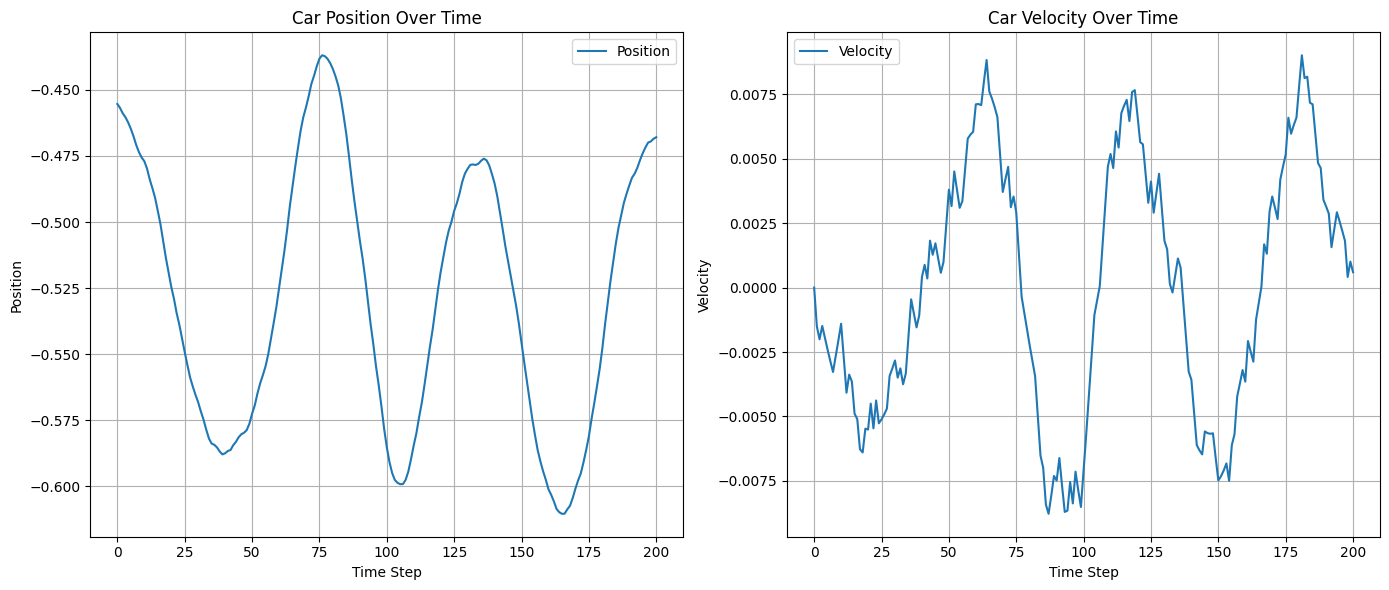

In [11]:
env = gym.make("MountainCar-v0")
random_agent = RandomAgent(env)
episode_reward, states = run_single_episode(random_agent)
print(f"Episode reward after taking random actions: {episode_reward}")
plot_states_over_time(states)

Run the agent for 100 episodes. At every episode initialize the environment with a new randomly sampled seed. Plot the duration of each episode as a scatter plot.

In [12]:
def run_multiple_episodes(agent, num_episodes=100):
    episode_durations = []

    for _ in range(num_episodes):
        done = False
        # Pass integer to forcibly reset PRNG of environment according to gymnasium docs
        # secrets.randbits() generates a random integer with 64 bits
        random_integer = secrets.randbits(64)  
        state = agent.env.reset(seed=random_integer)
        episode_length = 0

        while not done:
            action = agent.select_action(state)
            state, _, terminated, truncated, _ = agent.env.step(action)
            episode_length += 1
            done = terminated or truncated
        
        episode_durations.append(episode_length)
    
    return episode_durations

In [13]:
def plot_episode_durations(episode_durations):
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(episode_durations)), episode_durations, alpha=0.6)
    plt.title("Duration of Each Episode")
    plt.xlabel("Episode Number")
    plt.ylabel("Duration (in steps)")
    plt.grid(True)
    plt.show()

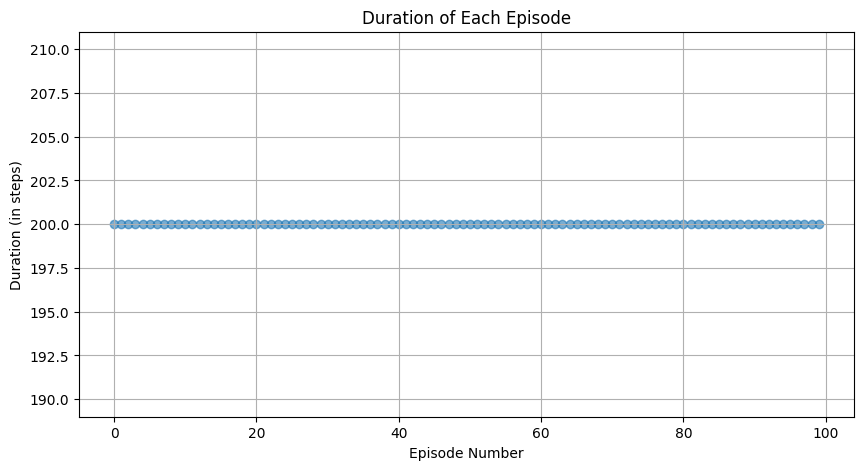

In [14]:
env = gym.make("MountainCar-v0")
random_agent = RandomAgent(env)
durations = run_multiple_episodes(random_agent, 100)
plot_episode_durations(durations)

Note from [Gymnasium Docs](https://www.gymlibrary.dev/environments/classic_control/mountain_car/#episode-end):

> The episode ends if either of the following happens:
>
> 1. **Termination:** The position of the car is greater than or equal to 0.5 (the goal position on top of the right hill)
> 2. **Truncation:** The length of the episode is 200.

So it appears the episode was always truncated before the goal could be reached (i.e. random policy is bad).

## DQN Agent Class

This code block describes the implementation of a DQN agent as described in task 3 of the project handout.

### Implementation

In [15]:
# Imports for DQN agent, neural network, and replay buffer
import torch
import torch.nn as nn
import random
import numpy as np
from collections import deque

In [16]:
# Define the Q-network as a MLP
class QNetwork(nn.Module):
    """
    a multi-layer perception (MLP) that takes a state s as input and outputs Q(s,a) for each
    action a

    Attributes
    ----------
    state_size:
        Number of input features, which corresponds to the dimension of the state space.
    action_size:
        Number of output features, which corresponds to the number of possible actions.
    hidden_layers:
        A list specifying the number of neurons in each hidden layer.
        Deafault is two hidden layers with 64 neurons each.
    """
    def __init__(self, state_size, action_size, hidden_layers=[64, 64]):
        super(QNetwork, self).__init__()
        layers = []
        input_size = state_size
        
        # Fully conected layers with ReLU activation
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(input_size, hidden_size))
            layers.append(nn.ReLU())
            input_size = hidden_size
            
        layers.append(nn.Linear(input_size, action_size))
        self.model = nn.Sequential(*layers) # Unpack list of layers into a sequential model
    
    def forward(self, x):
        return self.model(x)

In [17]:
# Define the replay buffer
class ReplayBuffer:
    def __init__(self, buffer_size):
        self.buffer = deque(maxlen=buffer_size)
    
    def add(self, state, action, next_state, reward, done):
        self.buffer.append((state, action, next_state, reward, done))
        
    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)
    
    def __len__(self):
        return len(self.buffer)

In [51]:
class DQNAgent:
    """
    DQN agent that uses a feed-forward network to estimate Q-values
    and an epsilon-greedy policy to take actions

    Attributes
    ----------
    Q:
        Approximates the Q-values for each state-action pair using a feed-forward neural network.
    replay_buffer:
        Stores experiences as tuples and allows for random sampling to train the Q-network.
        
    Methods
    -------
    update_target_network():
        Updates the target network to match the Q-network to stabilize training.
    """
    def __init__(self, state_size, action_size, hidden_layers=[64, 64],
                 gamma=0.99, epsilon=0.9, epsilon_min=0.05, epsilon_decay=0.995,
                 replay_buffer_size=10000, batch_size=64, lr=0.001):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.batch_size = batch_size
        self.current_loss = None
        
        self.Q = QNetwork(state_size, action_size, hidden_layers)
        self.target_Q = QNetwork(state_size, action_size, hidden_layers)
        self.optimizer = torch.optim.AdamW(self.Q.parameters(), lr=lr)
        self.replay_buffer = ReplayBuffer(replay_buffer_size)
        self.update_target_network()
        
    def update_target_network(self):
        self.target_Q.load_state_dict(self.Q.state_dict())

    def observe(self, state, action, next_state, reward, done):
        self.replay_buffer.add(state, action, next_state, reward, done)

    def select_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            with torch.no_grad():
                action_values = self.Q(state_tensor)
            return torch.argmax(action_values).item()

    def update(self):
        if len(self.replay_buffer) < self.batch_size:
            return
        
        batch = self.replay_buffer.sample(self.batch_size)
        states, actions, next_states, rewards, dones = zip(*batch)
        
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions).unsqueeze(1)
        rewards = torch.FloatTensor(rewards).unsqueeze(1)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones).unsqueeze(1)
        
        # Debugging
        # print(f"states shape: {states.shape}")
        # print(f"next_states shape 2: {next_states.shape}")
        # print(f"actions shape: {actions.shape}")
        
        current_q_values = self.Q(states).gather(1, actions)
        next_q_values = self.target_Q(next_states).max(1)[0].unsqueeze(1)
        target_q_values = rewards + (self.gamma * next_q_values * (1 - dones))
        
        loss = nn.MSELoss()(current_q_values, target_q_values)
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)
        self.current_loss = loss

In [53]:
# Test the DQN agent
env = gym.make("MountainCar-v0")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

dqn_agent = DQNAgent(state_size, action_size)

num_episodes = 10
for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    
    while not done:
        action = dqn_agent.select_action(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        
        dqn_agent.observe(state, action, next_state, reward, done)
        dqn_agent.update()
        
        state = next_state
        
    dqn_agent.update_target_network()
    print(f"Episode {episode + 1}/{num_episodes} finished")

Episode 1/10 finished
Episode 2/10 finished
Episode 3/10 finished
Episode 4/10 finished
Episode 5/10 finished
Episode 6/10 finished
Episode 7/10 finished
Episode 8/10 finished
Episode 9/10 finished
Episode 10/10 finished


### No auxiliary reward

In [ ]:
def tain_dqn(agent, env, num_episodes=1000):
    episode_rewards = []
    losses = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_reward = 0
        episode_loss = []

        while not done:
            action = agent.select_action(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            agent.observe(state, action, next_state, reward, done)
            agent.update()

            cumulative_rweward += reward
            state = next_state
            
            # Collect loss for this episode
            if hasattr(agent, "current_loss") and agent.current_loss is not None:
                episode_loss.append(agent.current_loss)

        agent.update_target_network()
        episode_rewards.append(episode_reward)
        
        # Append average loss for this episode
        if episode_loss:
            losses.append(np.mean(episode_loss))
        else:
            losses.append(0)
            
        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            print(f"Episode {episode + 1}/{num_episodes}. Average reward: {avg_reward:.2f}")
            
    return episode_rewards, losses




## Dyna Agent Class

This code block describes the implementation of a Dyna agent as described in task 4 of the project handout.

In [ ]:
class DynaAgent:
    def __init__(self, discr_step, gamma, epsilon, k, P_hat, R_hat, Q):
        self.discr_step = discr_step
        self.gamma = gamma
        self.epsilon = epsilon
        self.k = k
        self.P_hat = P_hat
        self.R_hat = R_hat
        self.Q = Q

    def observe(self, state, action, next_state, reward):
        pass

    def select_action(self, state):
        pass

    def update(self):
        pass